In [17]:
### Mohammadreza Zamani (10869960) – Asal Abbasnejadfard (10974178)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
different_TX = './transmission_power.csv'

In [3]:
df = pd.read_csv(different_TX, sep=',')

In [4]:
df

,Timestamp,Data
0,2024-03-03 19:04:29.955113,704.75
1,2024-03-03 19:04:30.005088,703.82
2,2024-03-03 19:04:30.054739,704.65
3,2024-03-03 19:04:30.105067,704.07
4,2024-03-03 19:04:30.154501,705.35
...,...,...
209,2024-03-03 19:04:40.400460,707.31
210,2024-03-03 19:04:40.450635,703.29
211,2024-03-03 19:04:40.500073,704.22
212,2024-03-03 19:04:40.550716,703.32


In [5]:
## Compute time lasting a battery

energy_bat = 19960 # In Joules

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Diference'] = df['Timestamp'].diff().dt.total_seconds()

df['Time'] = np.cumsum(df['Diference'])

In [6]:
df['Data'] = df['Data'] *1e-3

## High power data
df_high = df[df['Data'] > 1100 * 1e-3]

## Medium power data
filtered_values = np.where((df['Data'] < 1100 * 1e-3) & (df['Data'] > 750 * 1e-3))
df_medium = df.loc[filtered_values]

## Low power data
df_low = df[df['Data'] < 750 * 1e-3]

In [7]:
# Compute average power values

df_high_av = np.mean(df_high['Data'], axis = 0)
print('Average power of high power data:', df_high_av, "W")

df_medium_av = np.mean(df_medium['Data'], axis = 0)
print('Average power of medium power data:', df_medium_av, "W")

df_low_av = np.mean(df_low['Data'], axis = 0)
print('Average power of low power data:', df_low_av, "W")

df_av = np.mean(df['Data'], axis = 0)
print('Average power:', df_av, "W")


Average power of high power data: 1.2217599999999997 W
Average power of medium power data: 0.7972942857142857 W
Average power of low power data: 0.7042152999999999 W
Average power: 0.7241889719626169 W


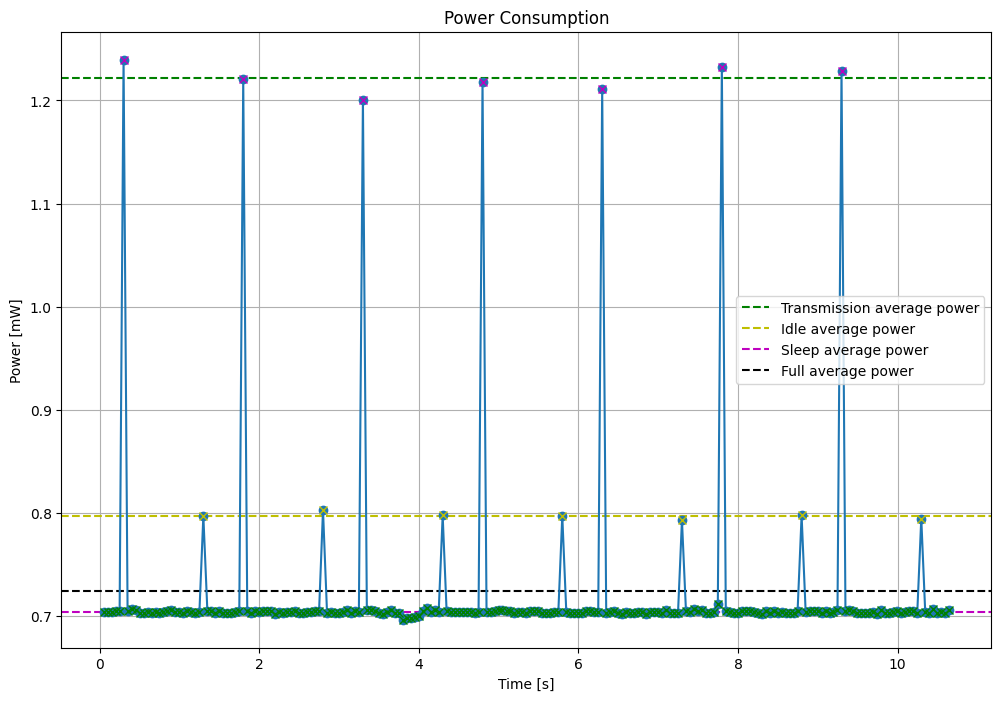

In [8]:
plt.figure(figsize=(12, 8))

## Horizontal lines
plt.axhline(y=df_high_av, color='g', linestyle='--', label='Transmission average power')
plt.axhline(y=df_medium_av, color='y', linestyle='--', label='Idle average power')
plt.axhline(y=df_low_av, color='m', linestyle='--', label='Sleep average power')
plt.axhline(y=df_av, color='k', linestyle='--', label='Full average power')

plt.plot(df['Time'], df['Data'], marker='o', linestyle='-')

plt.plot(df_high['Time'], df_high['Data'],color = 'm', marker='x', linestyle='')
plt.plot(df_medium['Time'], df_medium['Data'],color = 'y', marker='x', linestyle='')
plt.plot(df_low['Time'], df_low['Data'],color = 'g', marker='x', linestyle='')

plt.title('Power Consumption')
plt.xlabel('Time [s]')
plt.ylabel('Power [mW]')
plt.grid(True)
plt.legend(loc= 'center right')

plt.show()

In [9]:
low_values = np.where(df['Data'] < 750 * 1e-3)
high_values = np.where(df['Data'] > 1150 * 1e-3)

In [10]:
# One cycle duration
cycle_duration = df_high['Time'].diff().mean() #in seconds

In [11]:
# High value state duration
high_duration = 50e-3 #in seconds
high_energy = high_duration * df_high_av

print("Duration of transmission state: ", high_duration, "s", "Energy used in idle state: ", high_energy, "W")

Duration of transmission state:  0.05 s Energy used in idle state:  0.06108799999999999 W


In [12]:
medium_duration = 50e-3 #in seconds
medium_energy = medium_duration * df_medium_av
print("Duration of idle state: ", medium_duration, "s", "Energy used in idle state: ", medium_energy, "W")

Duration of idle state:  0.05 s Energy used in idle state:  0.03986471428571429 W


In [13]:
low_duration = cycle_duration - high_duration - medium_duration
low_energy = low_duration * df_low_av

print("Duration of sleep state: ", low_duration, "s", "Energy used in sleep state: ", high_energy, "W")


Duration of sleep state:  1.3995129999999991 s Energy used in sleep state:  0.06108799999999999 W


In [14]:
energy_cycle = high_energy + medium_energy + low_energy

In [15]:
print("Duration of cycle: ", cycle_duration, "s", "Energy used in sleep state: ", energy_cycle, "W")
print("Energy stored by the battery: ", energy_bat, "Joules")
print("Number of cycles of the battery: ", int(energy_bat//energy_cycle), "cycles")
print("Time to download the battery: ", (energy_bat/energy_cycle * cycle_duration)/60, "min")

Duration of cycle:  1.4995129999999992 s Energy used in sleep state:  1.0865111814346133 W
Energy stored by the battery:  19960 Joules
Number of cycles of the battery:  18370 cycles
Time to download the battery:  459.11905911053276 min
